In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input image
    layers.Dense(128, activation='relu'),  # First hidden layer
    layers.Dense(64, activation='relu'),   # Second hidden layer
    layers.Dense(10, activation='softmax') # Output layer
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Test accuracy: {test_acc}')


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2396 - accuracy: 0.9315 - val_loss: 0.1242 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1024 - accuracy: 0.9684 - val_loss: 0.1040 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0723 - accuracy: 0.9768 - val_loss: 0.0914 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0863 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0845 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0366 - accuracy: 0.9877 - val_loss: 0.0880 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0958 - val_accuracy:

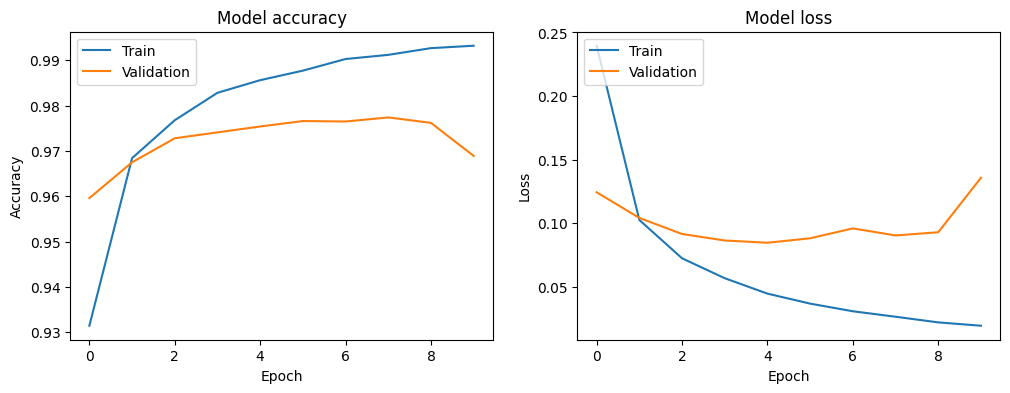

313/313 [==============================] - 1s 2ms/step


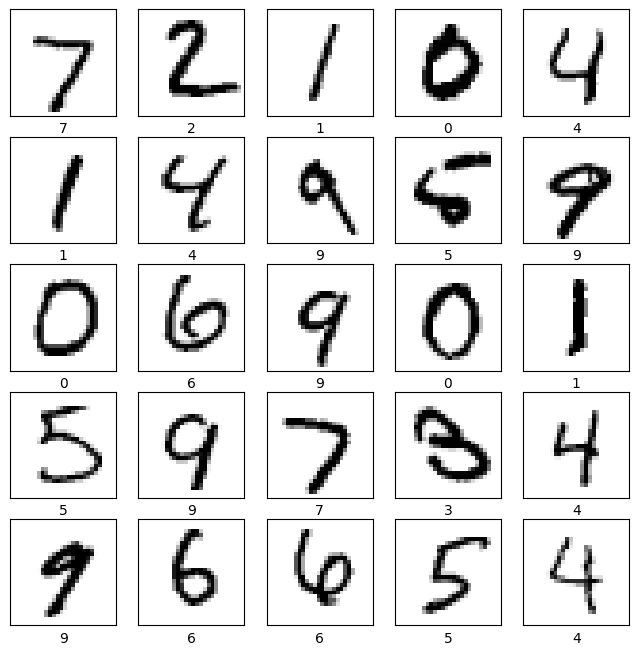

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Displaying some predictions
predictions = model.predict(test_images)
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
